> 一张统计图形就是从数据到几何对象(geometric object, 缩写为geom)的图形属性(aesthetic attributes, 缩写为aes)的一个映射。此外, 图形中还可能包含数据的统计变换(statistical transformation, 缩写为stats), 最后绘制在某个特定的坐标系(coordinate system, 缩写为coord)中, 而分面(facet)则可以用来生成数据中不同子集的图形。----- Hadley Wickham



In [1]:
import pandas as pd
import ggplot as gg #两个库对比着用，所以就不写 from ggplot import * 了
import plotnine as pn

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl

In [4]:
mpl.rcParams['font.family']='SimHei'

In [5]:
mpl.rcParams["axes.prop_cycle"] = mpl.cycler('color', ['1EAFAE', 'A3FFFF', '69FFFF'])
#mpl.style.use('lyncolss')
th=pn.theme_matplotlib(use_defaults=True)

In [12]:
#内置数据集
from plotnine.data import diamonds
dia=diamonds

In [5]:
#自建练习数据
df=pd.DataFrame({'x':['Mon.','Tue.','Wed.','Thu.','Fri.'],
                 'y':[76,37,90,60,50],
                 'z':[37,46,53,81,60],
                 'h':[2,5,1,3,3],
                 'k':['a','a','c','d','c']})

## 基础图形绘制
- 绘图框架
- 基础geom和图元

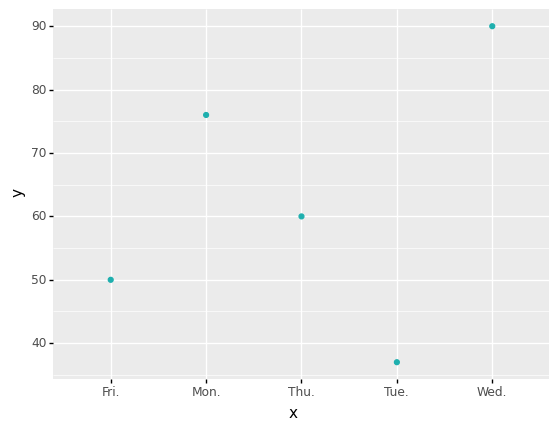

<ggplot: (-9223371860422389616)>

In [7]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_point(fill='#1EAFAE',color='#1EAFAE') #绘制基础散点图

In [4]:
pn.ggplot(df)+ pn.geom_point(pn.aes(x='x',y='y')) #第二种写法

NameError: name 'df' is not defined

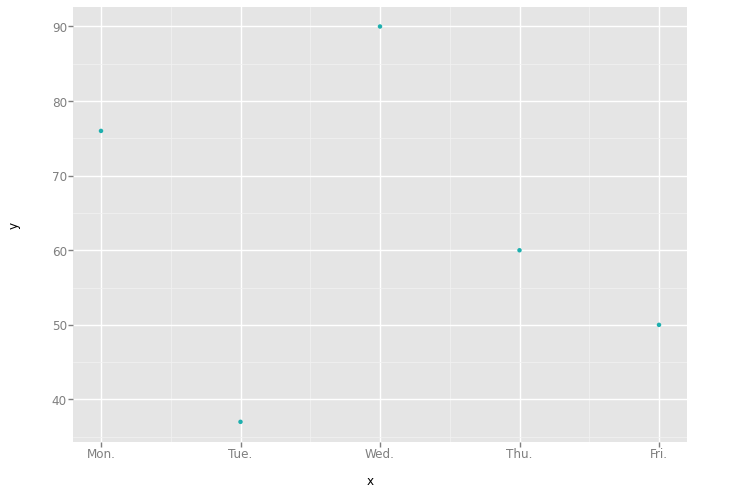

<ggplot: (-9223371860422343136)>

In [8]:
gg.ggplot(df,gg.aes(x='x',y='y'))+ gg.geom_point(color='#1EAFAE') #用ggplot库

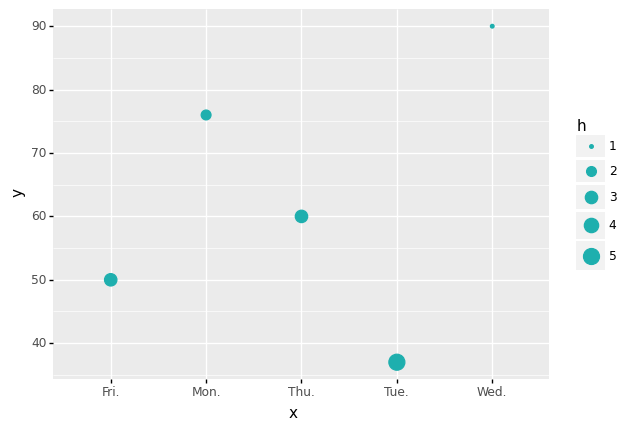

<ggplot: (176433248723)>

In [9]:
pn.ggplot(df)+ pn.geom_point(pn.aes(x='x',y='y',size='h'),color='#1EAFAE') #映射h的值到点的半径

In [19]:
#pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_bar()
#x是分类变量时，会报PlotnineError，需要设置geom_bar的参数为 stat = "identity" (默认是 stat_count）或者用geom_col()
#PlotnineError: 'stat_count() must not be used with a y aesthetic'

In [21]:
#pn.ggplot(df,pn.aes(x='k', y='y'))+ pn.geom_bar() #都是数值变量没问题 也会PlotnineError

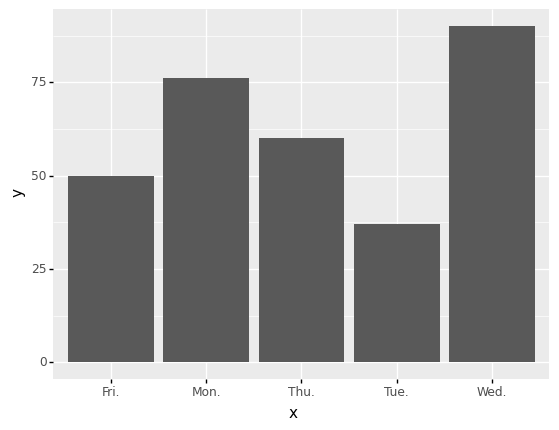

<ggplot: (185195750853)>

In [23]:
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_col()

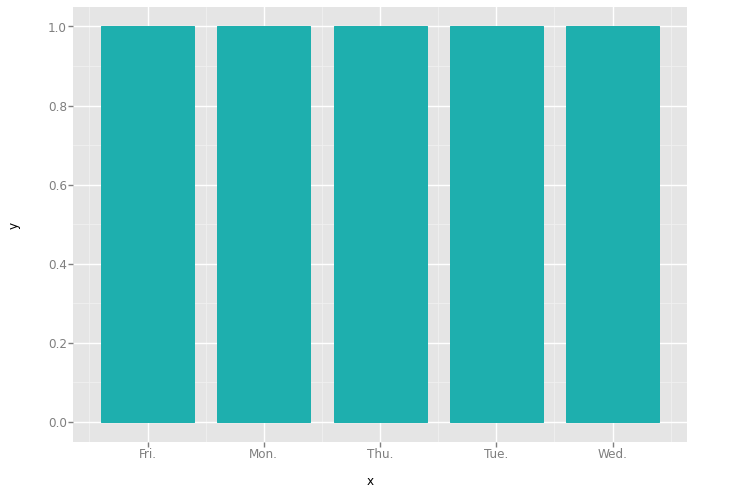

<ggplot: (-9223371860421393713)>

In [11]:
gg.ggplot(df,gg.aes(x='x', y='y'))+ gg.geom_bar(fill='#1EAFAE') #ggplot库的bar是可以出图的，但显然也是stat_count

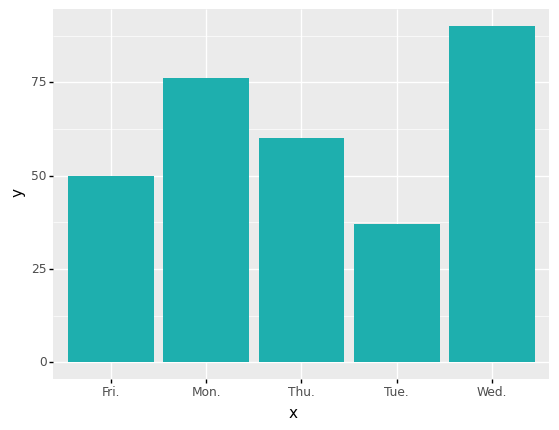

<ggplot: (185194475640)>

In [24]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE') #改颜色

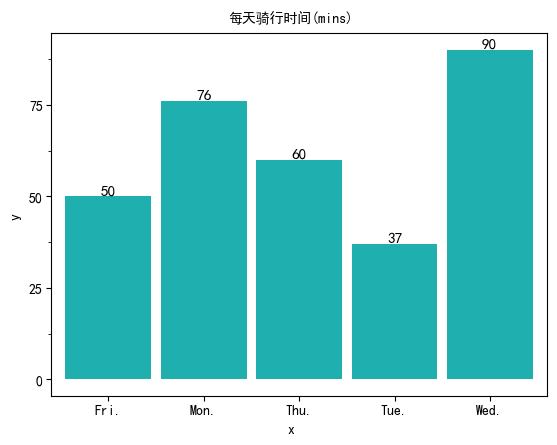

<ggplot: (-9223371851658933788)>

In [35]:
#增加文本标签和图表标题
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE') \
         + pn.geom_text(pn.aes(label='y'),va='bottom') +pn.ggtitle('每天骑行时间(mins)')+th

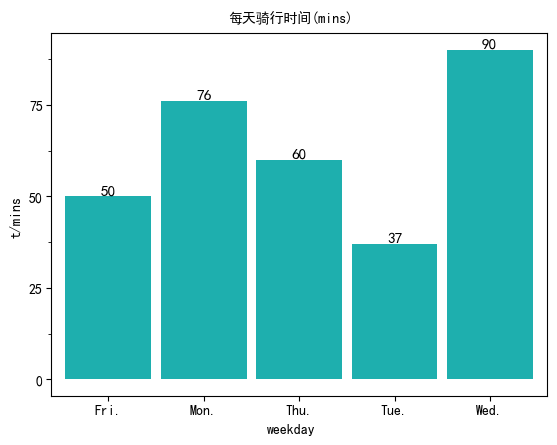

<ggplot: (-9223371851763659376)>

In [105]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_col(fill='#1EAFAE') \
         + pn.geom_text(pn.aes(label='y'),va='bottom') +pn.ggtitle('每天骑行时间(mins)')+pn.xlab('weekday')+pn.ylab('t/mins')+th

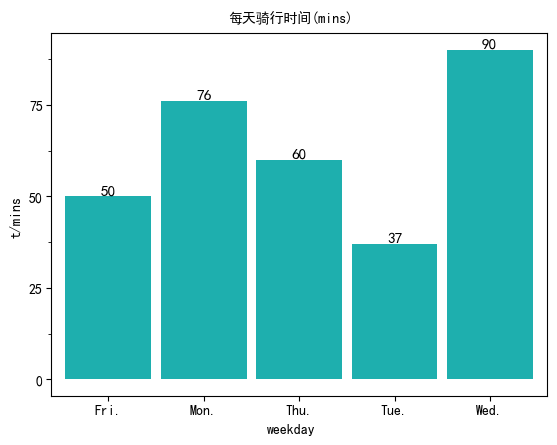

<ggplot: (-9223371851659377173)>

In [37]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE') \
         + pn.geom_text(pn.aes(label='y'),va='bottom') +pn.ggtitle('每天骑行时间(mins)')+pn.xlab('weekday')+pn.ylab('t/mins')+pn.theme_matplotlib(use_defaults=True)

In [ ]:
ggplot(df,aes(x='x',y='y')) \
    + geom_bar(stat = "identity",fill='#1EAFAE') \
    + geom_text(aes(label='y'),va='bottom') \
    + ggtitle('每天骑行时间(mins)') \
    + xlab('weekday')+pn.ylab('t/mins') \
    + theme_matplotlib()

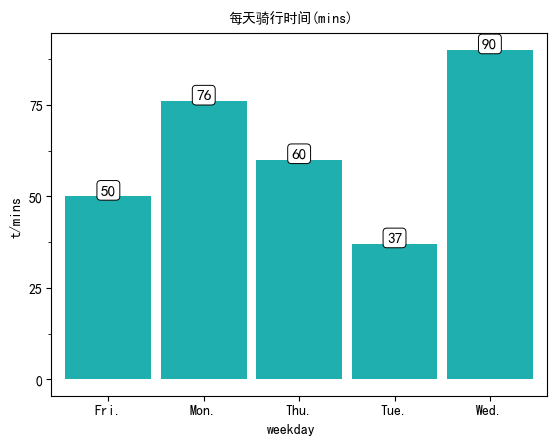

<ggplot: (185195776730)>

In [38]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE') \
         + pn.geom_label(pn.aes(label='y'),va='bottom') +pn.ggtitle('每天骑行时间(mins)')+pn.xlab('weekday')+pn.ylab('t/mins')+th

In [ ]:
#会有背景边框,而且官网找不到geom_label 了

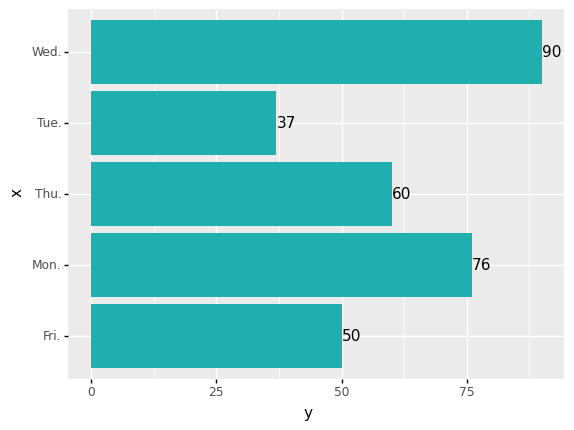

<ggplot: (185195776758)>

In [39]:
#换一个坐标系映射
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE')\
   + pn.geom_text(pn.aes(label='y'),ha='left')+ pn.coord_flip()

In [40]:
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE')+ pn.coord_polar()

AttributeError: module 'plotnine' has no attribute 'coord_polar'

In [ ]:
#plotnine目前没有极坐标系了，说法是极坐标跟着geom_carto一起完善
#https://github.com/has2k1/plotnine/issues/10

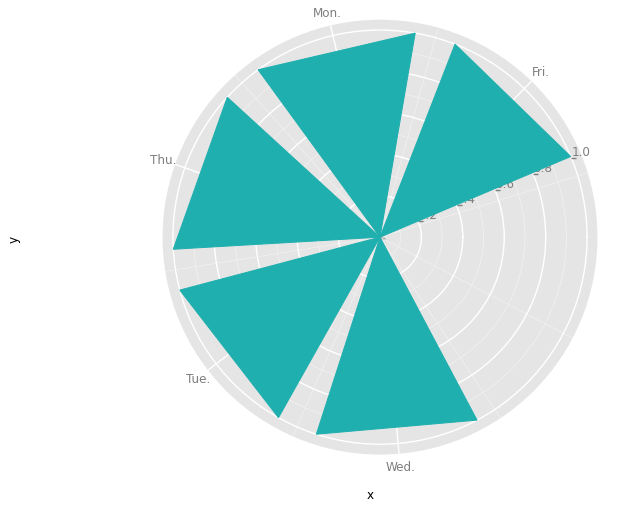

<ggplot: (-9223371851658730622)>

In [41]:
gg.ggplot(df,gg.aes(x='x', y='y'))+gg.geom_bar(stat = "identity",fill='#1EAFAE')+ gg.coord_polar()

In [56]:
#ggplot库还是有的,ggplot库没有geom_col()

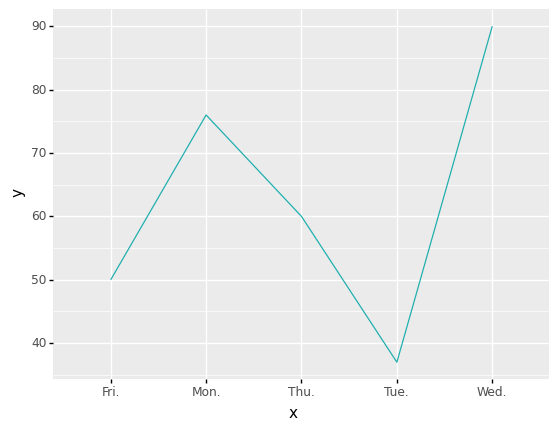

<ggplot: (-9223371860421339532)>

In [14]:
pn.ggplot(df,pn.aes(x='x', y='y',width=15))+ pn.geom_line(group = 1,color='#1EAFAE')          #折线图，x是分类变量，需要设置group参数

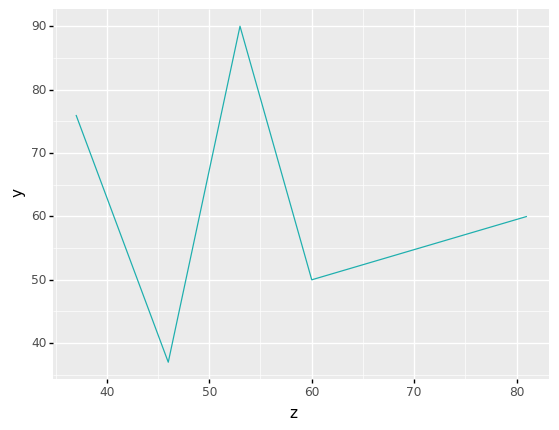

<ggplot: (185196069696)>

In [58]:
pn.ggplot(df,pn.aes(x='z', y='y'))+ pn.geom_line(group = 1,color='#1EAFAE')

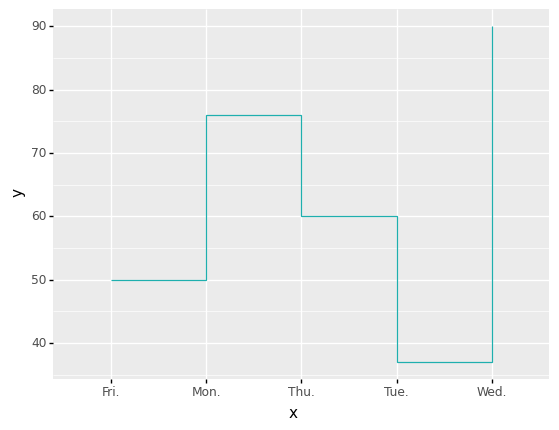

<ggplot: (185196295046)>

In [59]:
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_step(group = 1,color='#1EAFAE')

## 复合图表

- 多图叠加
- 统计处理
- 分面
- 主题和图元个性化

In [ ]:
#热身完毕

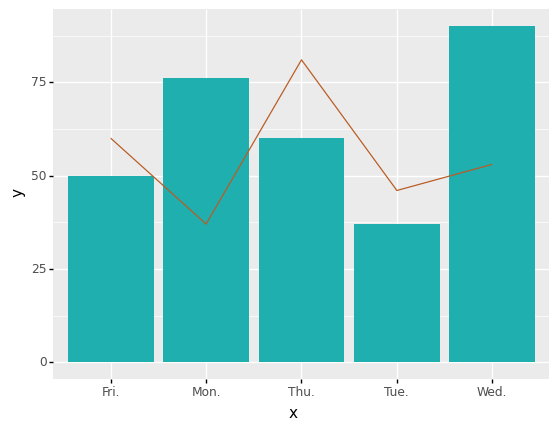

<ggplot: (185196346800)>

In [65]:
pn.ggplot(df,pn.aes(x='x',y='y'))+ pn.geom_bar(stat = "identity",fill='#1EAFAE') \
   + pn.geom_line(pn.aes(x='x',y='z'),group = 1,color='#ba5c25')

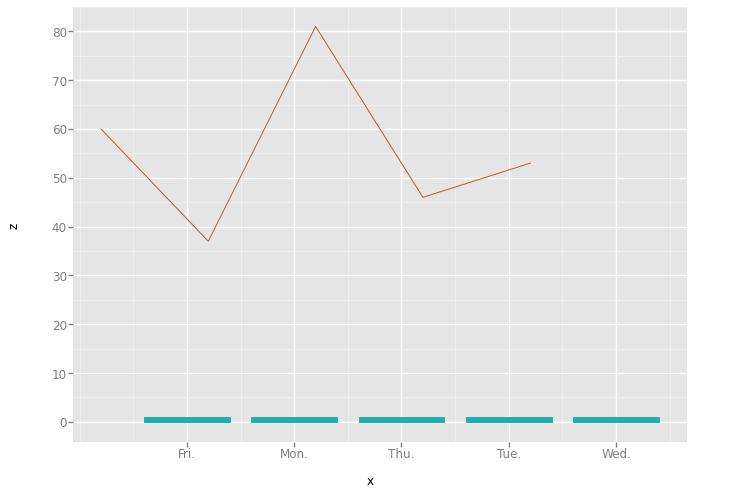

<ggplot: (185195997623)>

In [69]:
gg.ggplot(df,gg.aes(x='x',y='y'))+ gg.geom_bar(stat = "identity",fill='#1EAFAE')+gg.geom_line(gg.aes(x='x',y='z'),color='#ba5c25')

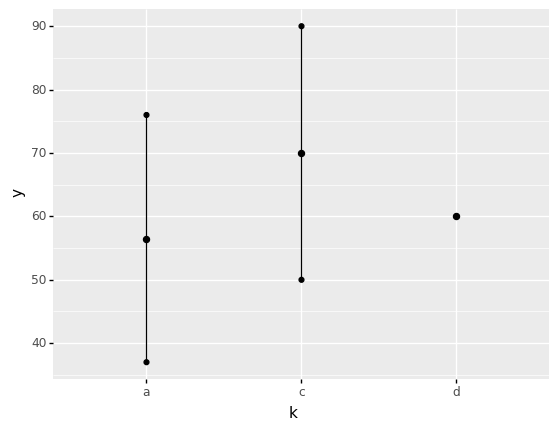

<ggplot: (-9223371851658416724)>

In [66]:
pn.ggplot(df,pn.aes(x='k', y='y'))+ pn.geom_point()+pn.stat_summary()                            #stats

In [6]:
from plotnine.data import diamonds
dia=diamonds

In [67]:
print(len(dia))
dia.head(2) #上面引入了plotnine内置的钻石数据集

53940


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [8]:
dia.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
    #对克拉carat和价格的拟合   #因为5万多条数据，跑起来有些慢

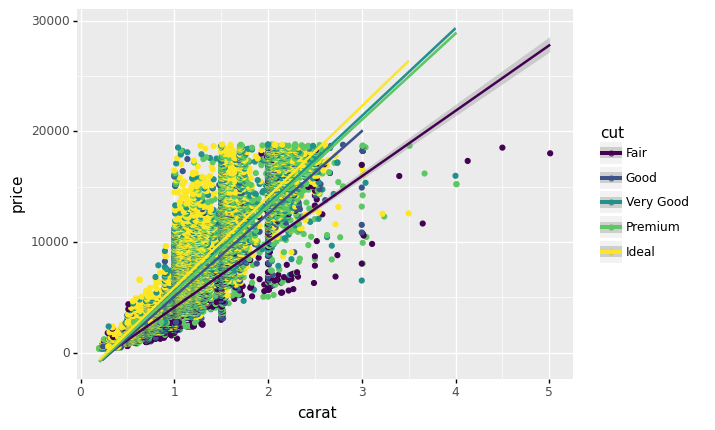

<ggplot: (185196487495)>

In [70]:
pn.ggplot(dia,pn.aes(x='carat', y='price',color='cut'))+ pn.geom_point()+pn.stat_smooth()           

AttributeError: 'DataFrame' object has no attribute 'sort'

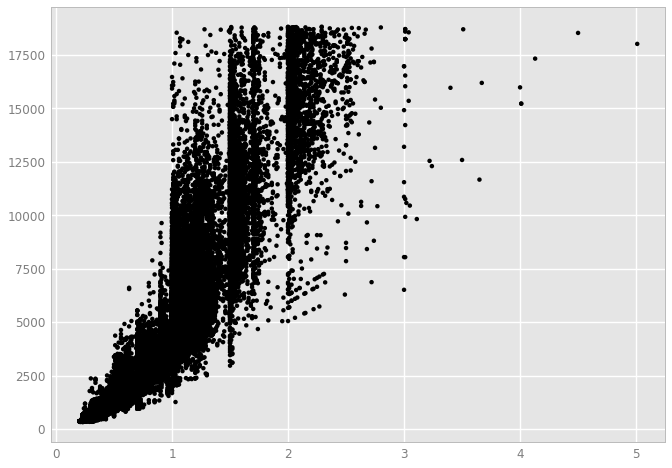

In [73]:
gg.ggplot(dia,gg.aes(x='carat', y='price'))+ gg.geom_point()+gg.stat_smooth()

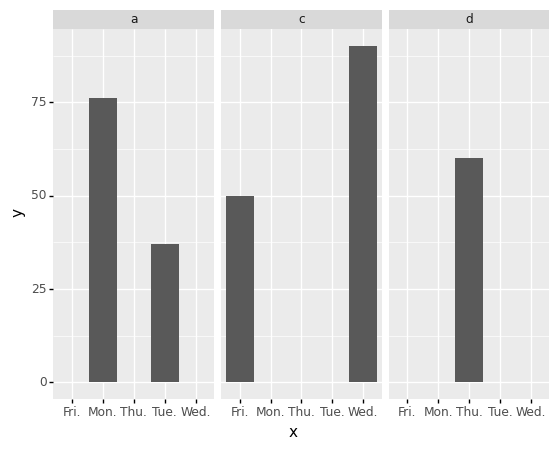

<ggplot: (-9223371851765378230)>

In [78]:
#分面 facets
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_col()+pn.facet_wrap('k')

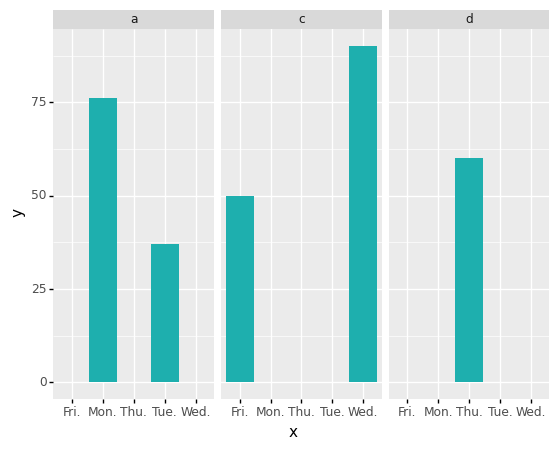

<ggplot: (-9223371851764753916)>

In [79]:
pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_col(fill='#1EAFAE')+pn.facet_wrap('k')

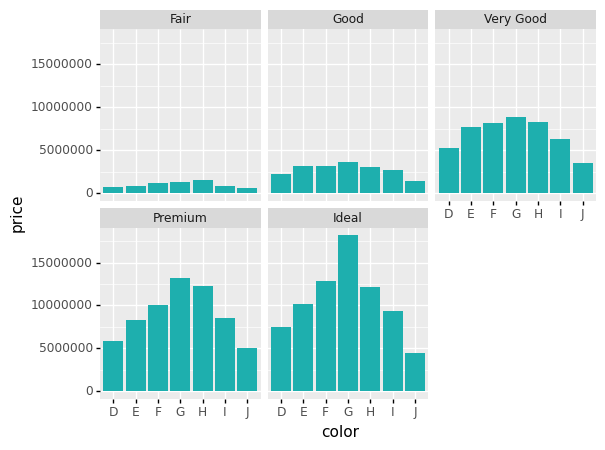

<ggplot: (-9223371855593918618)>

In [10]:
pn.ggplot(dia,pn.aes(x='color', y='price'))+ pn.geom_col(fill='#1EAFAE')+pn.facet_wrap('cut')

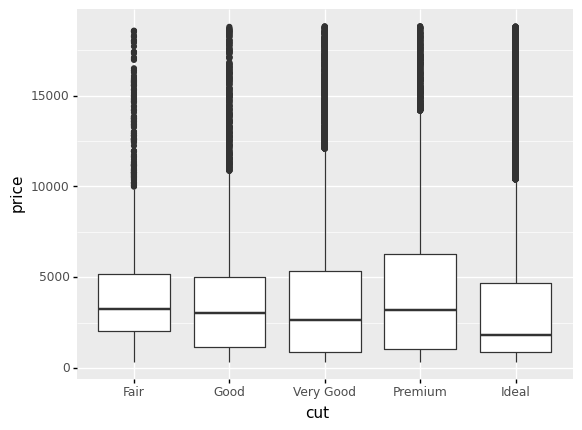

<ggplot: (-9223371851764473628)>

In [82]:
pn.ggplot(dia,pn.aes(x='cut', y='price'))+ pn.geom_boxplot()  #切割质量与价格

In [89]:
dic=dia.loc[dia['color']=='H']
len(dic)

8304

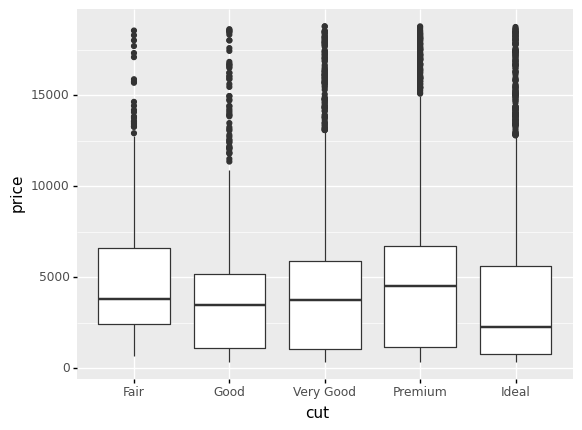

<ggplot: (185090894782)>

In [91]:
pn.ggplot(dic,pn.aes(x='cut', y='price'))+ pn.geom_boxplot() 

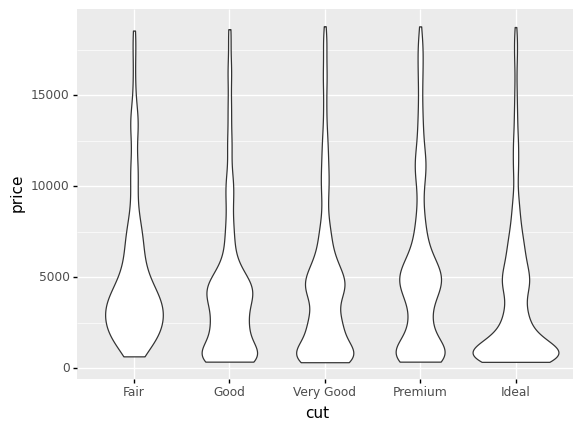

<ggplot: (-9223371851763884228)>

In [90]:
pn.ggplot(dic,pn.aes(x='cut', y='price'))+ pn.geom_violin()

In [ ]:
#设置主题  目前14种主题

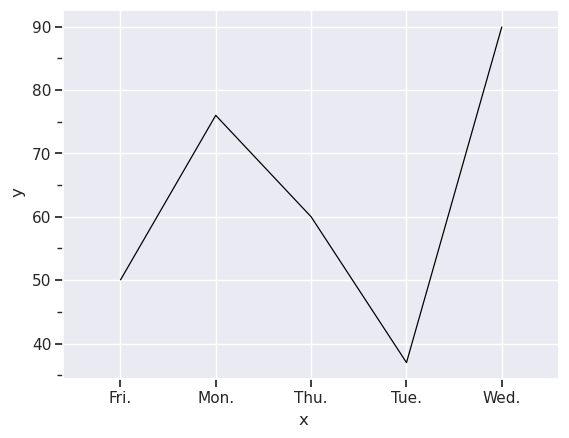

<ggplot: (185090385605)>

In [85]:
pn.ggplot(df,pn.aes(x='x', y='y'))+pn.geom_line(group = 1)+pn.theme_seaborn()

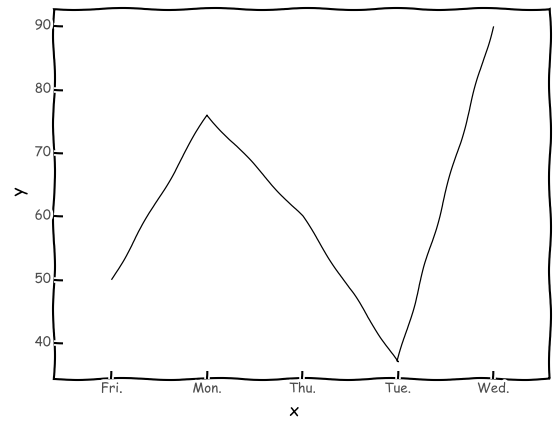

<ggplot: (185090441213)>

In [86]:
pn.ggplot(df,pn.aes(x='x', y='y'))+pn.geom_line(group = 1)+pn.theme_xkcd() #手绘效果

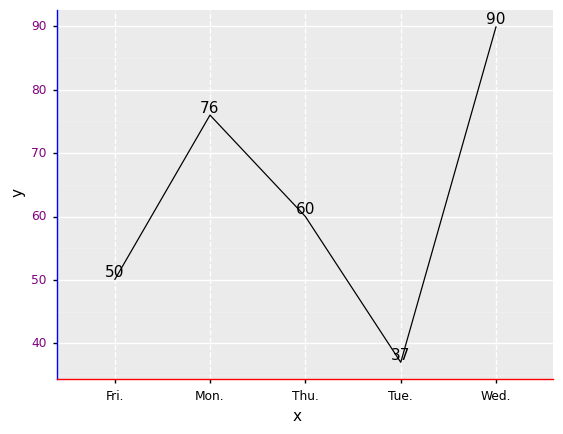

<ggplot: (-9223371851763740265)>

In [96]:
pn.ggplot(df,pn.aes(x='x', y='y'))+pn.geom_line(group = 1) + pn.geom_text(pn.aes(label='y'),va='bottom')+ pn.theme(
    axis_line_x=pn.element_line(color='red'),
    axis_line_y=pn.element_line(color='blue'),
    axis_text=pn.element_text(margin={'t': 5, 'r': 5}),
    panel_grid_major_x=pn.element_line(linetype='dashed'),
    axis_text_x=pn.element_text(color='black'),
    axis_text_y=pn.element_text(color='purple'),
    panel_grid_minor=pn.element_line(alpha=.25),
    panel_grid_minor_x=pn.element_line(color='red')
)

In [ ]:
#动画
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
pn.PlotnineAnimation(plots, interval=100, repeat_delay=500)

In [ ]:
#地图
pn.geom_map(lakes, fill=water_color, color=None)

In [84]:
#输出方面
p1=pn.ggplot(df,pn.aes(x='x', y='y'))+ pn.geom_col(fill='#1EAFAE')+pn.facet_wrap('k')
pn.save_as_pdf_pages([p1],'D:/AU/DefaultSettings/plot_save_pic_1.pdf')

C:\Users\lyndonlcf\AppData\Roaming\Python\Python37\site-packages\plotnine\ggplot.py:848: PlotnineWarning: Filename: D:/AU/DefaultSettings/plot_save_pic_1.pdf


In [8]:
help(gg)

Help on package ggplot:

NAME
    ggplot

PACKAGE CONTENTS
    aes
    chart_components
    colors (package)
    coords (package)
    datasets (package)
    discretemappers
    facets
    geoms (package)
    ggplot
    legend
    qplot
    scales (package)
    stats (package)
    themes (package)
    utils

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    chopsticks =      food_pinching_effeciency  individual  chops...     3...
    diamonds =        carat        cut color clarity  depth  ta...2757  5....
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    meat =           date    beef   veal    pork  lamb_and_...           3...
    movies =                           title  year  length   ...   0      ...
    mpg =     manufacturer   model  displ  year  cyl      ...midsize  
    233...
    mtcars =                    name   mpg  cyl   disp   hp  ...9     5   ...
    pageviews =               date_hour     pageviews
    

## 参考资料
- [plotnine官方文档](https://plotnine.readthedocs.io/en/stable/api.html)
- [plotnine cheat sheet](https://github.com/Easy-Shu/Beautiful-Visualization-with-python)